# SOPHY Database
### Southern Ocean Phytoplankton Database
- Made by Ayush Nag and Hannah-Joy Warren (add others)
- UW Oceanography (add other credits)

In [1]:
import sqlite3
import pandas as pd
import pyworms
from pandas import DataFrame
# import cartopy.feature
import matplotlib.pyplot as plt 
import scipy.io as sio
from shapely.geometry import Polygon, Point, MultiPoint
# import cartopy.crs as ccrs
import numpy as np
import shapely
import matplotlib.path as mpath
import geopandas as gpd
import shapely.validation
import pyproj
# import shapefile as shp
import fiona
from shapely.ops import transform

C:\Users\Ayush Nag\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [ ]:
con = sqlite3.connect("sophy.db")
cur = con.cursor()

Sample functions to use

In [ ]:
# functions with common use cases
# results at lat long
# distance and time for lat long
# take in a list of values that represent a path and get all results (within certain range of provided values )
# fronts, sectors
# default definition of sectors, fronts that can be easily updated 

# filter by front zones and sectors


Read from the SOPHY database and receive a DataFrame <br />
Write SQLite queries directly

In [ ]:
import warnings


query = "select scientific_name from microscopy"
pd.read_sql_query(query, con)

In [ ]:
pd.read_pickle(r"C:\users\ayush nag\Downloads\data\02_intermediate\SOCCOM_bgc_argo_float_data\all_floatdata_analyzed.pkl")

In [ ]:
# map_proj = ccrs.SouthPolarStereo()
# fig = plt.figure(figsize=[20, 20])  # inches
# ax = plt.subplot(projection=map_proj)
# ax.set_extent([-180, 180, -90, -39.4], ccrs.PlateCarree())
# fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)
#
# ax.add_feature(cartopy.feature.LAND)
# ax.add_feature(cartopy.feature.COASTLINE)
# ax.gridlines(draw_labels=True)

# Writes the Kim & Orsi 2014 fronts to a shapefile
mat_data: dict = sio.loadmat("../data/fronts/ys_fronts.mat")
# fronts = ([[lat1, lon1], [lat2, lon2]], [[lat1, lon1], ...], ...)
orsi_fronts: tuple = mat_data['ys_fronts'].tolist()[0][0]
# filters out extra data and only keeps the 4 Southern Ocean fronts
orsi_fronts = orsi_fronts[:4]
colors = ['c', 'b', 'g', 'r']
wgs84 = pyproj.CRS('EPSG:4326')
utm = pyproj.CRS('EPSG:9354')

In [ ]:
# front = orsi_fronts[0].T
# # remove points where latitude is negative (range is [0, 360])
# extra = np.where(front[0] < 0)
# lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
# lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
# # lat, lon = np.append(lat, lat[0]), np.append(lon, lon[0])
# points = np.stack((lat, lon), axis=-1)
# # new_points = map_proj.transform_points(ccrs.PlateCarree(), lat, lon)
# # points = np.round(points, 3)
# # poly = Polygon(points)
# plt.plot(lat, lon)
# plt.show()
# # ax.plot(front[0], front[1], marker='o', linestyle='', color=colors[i], transform=ccrs.PlateCarree())
temp = [0, 1550, 1734, 1488]
transformed: list = []

for f in orsi_fronts:
    front = f.T
    extra = np.where(front[0] < 0)
    lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
    lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
    x = np.stack((lat, lon))
    plt.plot(lat, lon)
plt.show()


In [ ]:
front = orsi_fronts[0].T
extra = np.where(front[0] > 180)
lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
misc = np.arange(20, 40)
lat, lon = np.delete(lat, misc), np.delete(lon, misc)
polygon_geom = Polygon(zip(lat, lon))
# ax.add_geometries([polygon_geom], crs=ccrs.SouthPolarStereo(), facecolor='b', edgecolor='red', alpha=0.8)
# plt.show()

In [ ]:
for i in range(len(orsi_fronts)):
    front = orsi_fronts[i].T
    extra = np.where(front[0] < 0)
    lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
    lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
    polygon_geom = Polygon(zip(lat, lon))
    x, y = polygon_geom.exterior.xy
    plt.plot(x, y)
plt.show()

In [ ]:
wgs84 = pyproj.CRS('EPSG:4326')
utm = pyproj.CRS('EPSG:3031')

project = pyproj.Transformer.from_crs(wgs84, utm, always_xy=True).transform
f = transform(project, polygon_geom)
test = transform(project, Point(-140, -60))


x, y = f.exterior.xy
plt.plot(x, y)
plt.scatter(test.x, test.y)
plt.show()
f
# shapely.validation.explain_validity(thing)
#TODO: Remove anomalies with xy bounding box

In [ ]:
mat_data: dict = sio.loadmat("../data/fronts/ys_fronts.mat")
# mat_data = ([[lat1, lon1], [lat2, lon2]], [[lat1, lon1], ...], ...)
orsi_fronts: tuple = mat_data['ys_fronts'].tolist()[0][0]
# filters out extra data and only keeps the 4 Southern Ocean fronts
orsi_fronts = orsi_fronts[:4]
fronts: list = []
for i in range(len(orsi_fronts)):
    front = orsi_fronts[i].T
    # data has points [-180, 360] but [-180, 180] is duplicate of [0, 360]
    extra = np.where(front[0] > 180)
    # delete [180, 360]
    lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
    # remove NaN's
    lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
    # np.stack(lat, lon)
    fronts.append(MultiPoint(np.stack((lat, lon), axis=-1)))

print(fronts[0])

In [ ]:
p = Point(-183, -56)
p1 = nearest_points(p, fronts[0])
print(p1[1])
p2 = nearest_points(p, fronts[1])
print(p2[1])
p3 = nearest_points(p, fronts[2])
print(p3[1])
p4 = nearest_points(p, fronts[3])
print(p4[1])
print(p.distance(p1))
print(p.distance(p2))
print(p.distance(p3))
print(p.distance(p4))

Valid Geometry
Valid Geometry
Valid Geometry
Valid Geometry


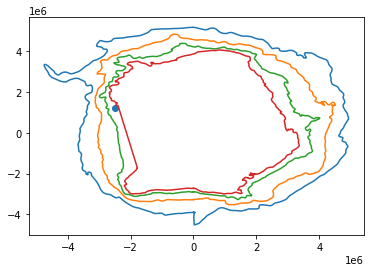

In [24]:
# Writes the Kim & Orsi 2014 fronts to a shapefile
mat_data: dict = sio.loadmat("../data/fronts/ys_fronts.mat")
# fronts = ([[lat1, lon1], [lat2, lon2]], [[lat1, lon1], ...], ...)
orsi_fronts: tuple = mat_data['ys_fronts'].tolist()[0][0]
# filters out extra data and only keeps the 4 Southern Ocean fronts
orsi_fronts = orsi_fronts[:4]
colors = ['c', 'b', 'g', 'r']
wgs84 = pyproj.CRS('EPSG:4326')
utm = pyproj.CRS('EPSG:3031')
project = pyproj.Transformer.from_crs(wgs84, utm, always_xy=True).transform

misc = ((44, 2633), (0, 2305), (0, 2614), (60, 2154))
shapes: list = []


for i in range(len(orsi_fronts)):
    # front = orsi_fronts[i].T
    front_df = pd.DataFrame(data=orsi_fronts[i], columns=['Latitude', 'Longitude'], index=np.arange(len(orsi_fronts[i])))
    front_df = front_df.iloc[misc[i][0]:misc[i][1]]
    front_df = front_df[front_df.Latitude <= 180]
    # extra = np.where(front[0] > 180)
    # lat, lon = np.delete(front[0], extra), np.delete(front[1], extra)
    # lat, lon = lat[~np.isnan(lat)], lon[~np.isnan(lon)]
    # lat, lon = np.delete(lat, misc[i]), np.delete(lon, misc[i])
    shape = Polygon(zip(front_df.Latitude, front_df.Longitude))
    f = transform(project, shape)
    shapes.append(f)
    print(shapely.validation.explain_validity(f))
    x, y = f.exterior.xy
    plt.plot(x, y)
plt.scatter(-2494548.002, 1195276.366)
plt.show()

# thing = Polygon(zip(x.tolist(), y.tolist()))
# shapely.validation.explain_validity(thing)

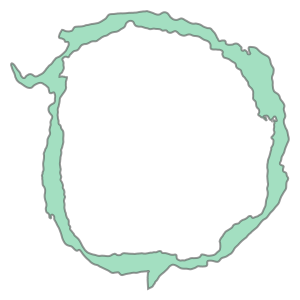

In [6]:
# front_zones: tuple = ('STZ', 'SAZ', 'PFZ', 'ASZ', 'SIZ')
# zones: dict = {'SAZ': shapes[0] - shapes[1], 'PFZ': shapes[1] - shapes[2], 'ASZ': shapes[2] - shapes[3]}
shapes[0] - shapes[1]

In [28]:
df = pd.read_csv("../data/datasets/lter.csv", encoding='unicode_escape')
df = df.filter(('Latitude', 'Longitude'))
lter_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs='EPSG:4326')
lter_gdf.to_crs(epsg=3031, inplace=True)

zones: dict = {'zone': ['SAF', 'PF', 'SACC'], 'geometry': [shapes[0] - shapes[1], shapes[1] - shapes[2], shapes[2] - shapes[3]]}
zones_gdf = gpd.GeoDataFrame(zones, crs='EPSG:3031')

# gpd.read_file('../data/shapefiles/world.shp')


# (shapes[2] - shapes[3]).contains(Point(-2497472.462, 1215311.912))
gpd.sjoin(lter_gdf, zones_gdf)['zone'][0]
# gpd.datasets.get_path('naturalearth_lowres')
# print()

'SACC'

In [23]:
lat, lon = 60, 61
pd.DataFrame([(lat, lon)], columns=['lat', 'lon'])

,lat,lon
0,60,61


In [8]:
f = open(r"../data/sea_ice/mean.sep.1979-2021.s", "r")
(np.fromfile(f, dtype=np.uint32))

array([0, 0, 0, ..., 0, 0, 0], dtype=uint32)

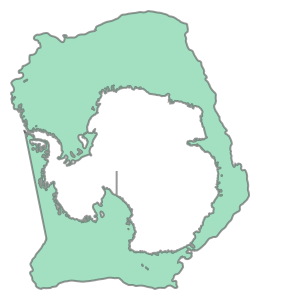

In [14]:
# geojson_data = shp.Reader("../data/shapefiles/world.shp").__geo_interface__
# world = gpd.GeoDataFrame.from_features(geojson_data, crs=4326)
# antarctica = world[world['NAME'] == 'Antarctica']
# antarctica = antarctica.to_crs(epsg=3031)
# ashape = antarctica['geometry'].values[0]
# shapes[3] - ashape
# antarctica.plot()
world = gpd.read_file('../data/shapefiles/world/world.shp')
antarctica = world[world['NAME'] == 'Antarctica']
antarctica = antarctica.to_crs(epsg=3031)
shapes[3] - antarctica['geometry'].values[0]
